In [71]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from tqdm import tqdm_notebook as tqdm
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [80]:
file_stats = pd.read_csv('./file_stats.csv', dtype={'Id':'object'})
file_stats.head()

,Id,Sex,Age,Industry,Constellation
0,1000331,female,37,NaN,Leo
1,1000866,female,17,Student,Libra
2,1004904,male,23,Arts,Capricorn
3,1005076,female,25,Arts,Cancer
4,1005545,male,25,Engineering,Sagittarius


In [ ]:
def get_sentiment_score(text):
    blob = TextBlob(text)
    sen = np.array([s.sentiment.polarity for s in blob.sentences])
    return sen.mean()

#### WARNING: Generating sentiment score for all 19,320 documents would cost about 90 minutes with a 2.8 GHz Intel 4-Core i7 processor.  
The results can be found in file_stats_sentiment.csv

In [105]:
scores = {}
path = './clean/'
for file_name in tqdm(os.listdir(path)):
    with open(path+file_name) as f:
        scores[file_name] = get_sentiment_score(f.readline())

In [107]:
file_stats['Sentiment'] = file_stats.Id.map(scores)

/anaconda/envs/nlp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


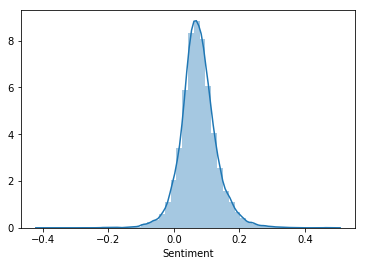

In [109]:
sns.distplot(file_stats.Sentiment)

##### Astrology cannot be trusted

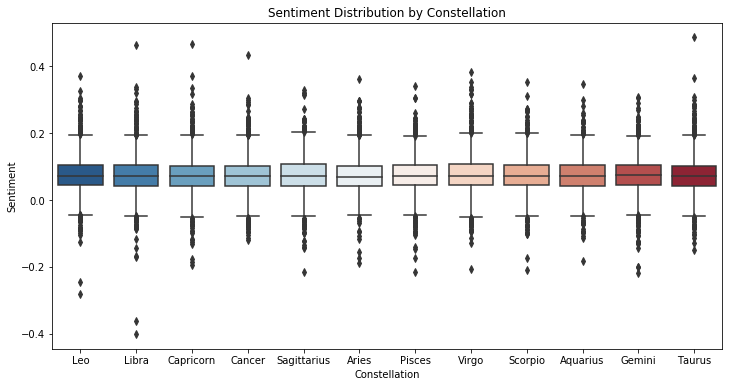

In [113]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Constellation', y='Sentiment', data=file_stats, palette='RdBu_r')
plt.title('Sentiment Distribution by Constellation')
plt.show()

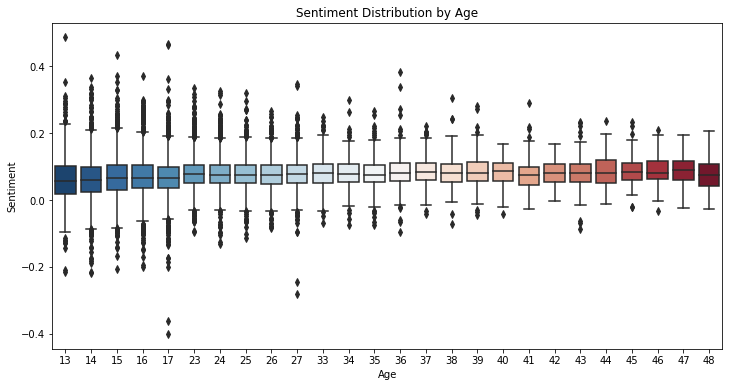

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Sentiment', data=file_stats, palette='RdBu_r')
plt.title('Sentiment Distribution by Age')
plt.show()

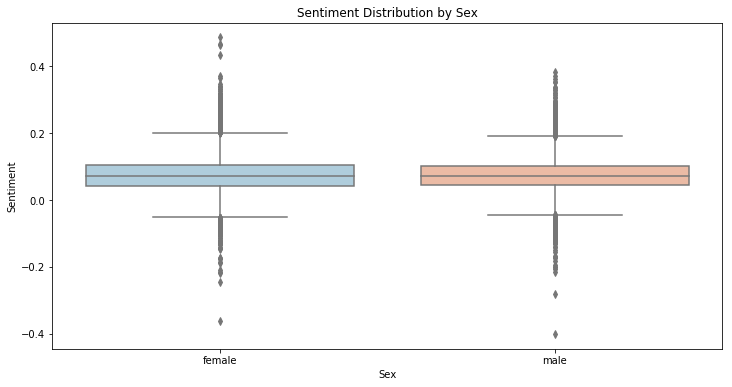

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Sentiment', data=file_stats, palette='RdBu_r')
plt.title('Sentiment Distribution by Sex')
plt.show()

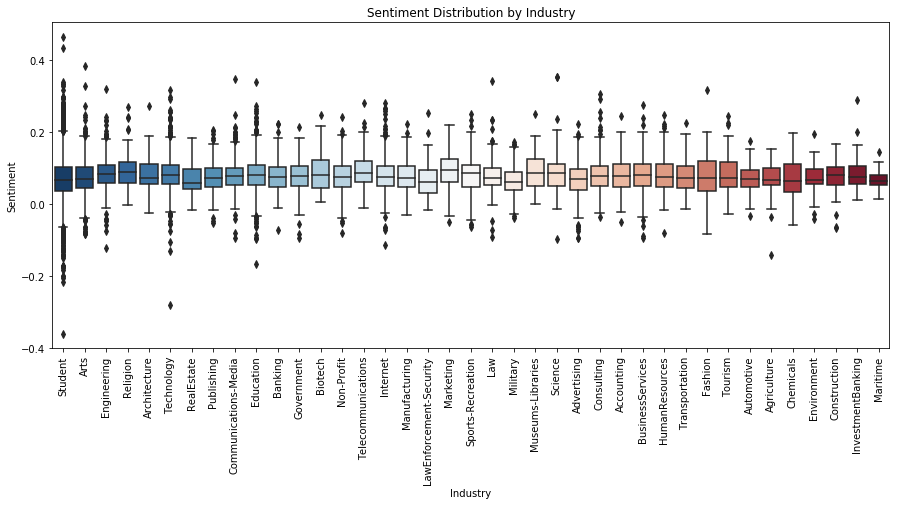

In [137]:
plt.figure(figsize=(15, 6))
g = sns.boxplot(x='Industry', y='Sentiment', data=file_stats, palette='RdBu_r')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Sentiment Distribution by Industry')
plt.show()

In [143]:
file_stats.to_csv('file_stats_sentiment.csv', index=False)